# 📌Extracción

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('TelecomX_Data.json')

In [3]:
customer = pd.json_normalize(df["customer"])
phone = pd.json_normalize(df["phone"])
internet = pd.json_normalize(df["internet"])
account = pd.json_normalize(df["account"])

#unificar las columnas al dataset original
df = df.drop(columns=["customer"]).join(customer)
df = df.drop(columns=["phone"]).join(phone)
df = df.drop(columns=["internet"]).join(internet)
df = df.drop(columns=["account"]).join(account)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# 🔧 Transformación

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
df.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [6]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [7]:
# Revisar valores faltates
print(df.isnull().sum())

# Porcentaje de valores faltantes
print((df.isnull().sum() / len(df)) * 100)


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
customerID          0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
Charges.Monthly     0.0
Charges.Total       0.0
dtype: float64


In [8]:
# Valores duplicados
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
print(duplicates)


Number of duplicate rows: 0
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [9]:
# Lista de valores unicos
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Columna '{col}' valores unicos:\n", df[col].unique())


Columna 'customerID' valores unicos:
 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Columna 'Churn' valores unicos:
 ['No' 'Yes' '']
Columna 'gender' valores unicos:
 ['Female' 'Male']
Columna 'Partner' valores unicos:
 ['Yes' 'No']
Columna 'Dependents' valores unicos:
 ['Yes' 'No']
Columna 'PhoneService' valores unicos:
 ['Yes' 'No']
Columna 'MultipleLines' valores unicos:
 ['No' 'Yes' 'No phone service']
Columna 'InternetService' valores unicos:
 ['DSL' 'Fiber optic' 'No']
Columna 'OnlineSecurity' valores unicos:
 ['No' 'Yes' 'No internet service']
Columna 'OnlineBackup' valores unicos:
 ['Yes' 'No' 'No internet service']
Columna 'DeviceProtection' valores unicos:
 ['No' 'Yes' 'No internet service']
Columna 'TechSupport' valores unicos:
 ['Yes' 'No' 'No internet service']
Columna 'StreamingTV' valores unicos:
 ['Yes' 'No' 'No internet service']
Columna 'StreamingMovies' valores unicos:
 ['No' 'Yes' 'No internet service']
Columna 'Contract' valor

In [ ]:
df['Churn'] = df['Churn'].replace('', 'unk').fillna('unk') # asignar valores '' con unk

# Manejo de inconsistencias
df['Churn'] = df['Churn'].str.lower().str.strip()
df['gender'] = df['gender'].str.lower().str.strip()
df['Partner'] = df['Partner'].str.lower().str.strip()
df['Dependents'] = df['Dependents'].str.lower().str.strip()
df['PhoneService'] = df['PhoneService'].str.lower().str.strip()
df['MultipleLines'] = df['MultipleLines'].str.lower().str.strip()
df['InternetService'] = df['InternetService'].str.lower().str.strip()
df['OnlineSecurity'] = df['OnlineSecurity'].str.lower().str.strip()
df['OnlineBackup'] = df['OnlineBackup'].str.lower().str.strip()
df['DeviceProtection'] = df['DeviceProtection'].str.lower().str.strip()
df['TechSupport'] = df['TechSupport'].str.lower().str.strip()
df['StreamingTV'] = df['StreamingTV'].str.lower().str.strip()
df['StreamingMovies'] = df['StreamingMovies'].str.lower().str.strip()
df['Contract'] = df['Contract'].str.lower().str.strip()
df['PaperlessBilling'] = df['PaperlessBilling'].str.lower().str.strip()
df['PaymentMethod'] = df['PaymentMethod'].str.lower().str.strip()

In [33]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [34]:
# Lista de valores unicos
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Columna '{col}' valores unicos:\n", df[col].unique())

Columna 'customerID' valores unicos:
 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Columna 'gender' valores unicos:
 ['female' 'male']
Columna 'MultipleLines' valores unicos:
 ['no' 'yes' 'no phone service']
Columna 'InternetService' valores unicos:
 ['dsl' 'fiber optic' 'no']
Columna 'OnlineSecurity' valores unicos:
 ['no' 'yes' 'no internet service']
Columna 'OnlineBackup' valores unicos:
 ['yes' 'no' 'no internet service']
Columna 'DeviceProtection' valores unicos:
 ['no' 'yes' 'no internet service']
Columna 'TechSupport' valores unicos:
 ['yes' 'no' 'no internet service']
Columna 'StreamingTV' valores unicos:
 ['yes' 'no' 'no internet service']
Columna 'StreamingMovies' valores unicos:
 ['no' 'yes' 'no internet service']
Columna 'Contract' valores unicos:
 ['one year' 'month-to-month' 'two year']
Columna 'PaymentMethod' valores unicos:
 ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [35]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [36]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [ ]:
df['Churn'] = df['Churn'].map({'yes': 1, 'no': 0, 'unk': 2})
df['Partner'] = df['Partner'].map({'yes': 1, 'no': 0})
df['Dependents'] = df['Dependents'].map({'yes': 1, 'no': 0})
df['PhoneService'] = df['PhoneService'].map({'yes': 1, 'no': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'yes': 1, 'no': 0})

In [17]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,female,0,0,0,13,1,no,dsl,...,no,yes,no,no,one year,0,mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,1,male,0,1,0,22,1,yes,fiber optic,...,no,no,no,yes,month-to-month,1,electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,0,male,0,0,0,2,1,no,dsl,...,no,no,no,no,month-to-month,1,mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,male,0,1,1,67,1,no,dsl,...,yes,yes,no,yes,two year,0,mailed check,67.85,4627.65,2.261667


# 📊 Carga y análisis

In [22]:
desc = df.describe().T 
desc

,count,mean,std,min,25%,50%,75%,max
Churn,7267.0,0.318839,0.528079,0.000000,0.000000,0.000000,1.000000,2.000000
SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7267.0,0.484106,0.499782,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7267.0,0.300124,0.458343,0.000000,0.000000,0.000000,1.000000,1.000000
tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
PhoneService,7267.0,0.902711,0.296371,0.000000,1.000000,1.000000,1.000000,1.000000
PaperlessBilling,7267.0,0.593230,0.491265,0.000000,0.000000,1.000000,1.000000,1.000000
Charges.Monthly,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
Cuentas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


In [23]:
churn_counts = df['Churn'].value_counts()

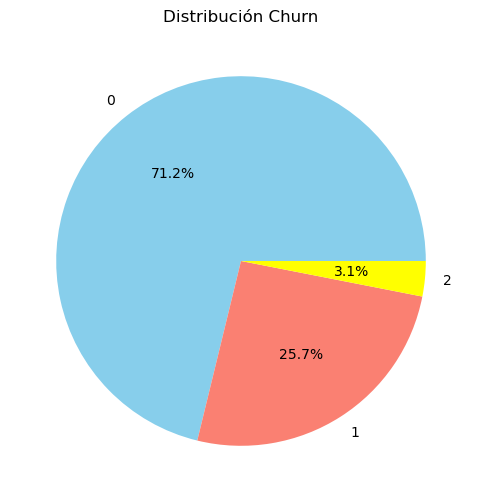

In [25]:
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'yellow'])
plt.title("Distribución Churn")
plt.show()

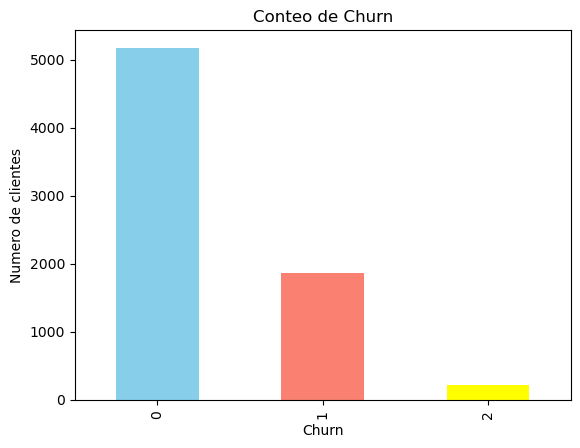

In [ ]:
churn_counts.plot(kind='bar', color=['skyblue', 'salmon', 'yellow'])
plt.title("Conteo de Churn")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()

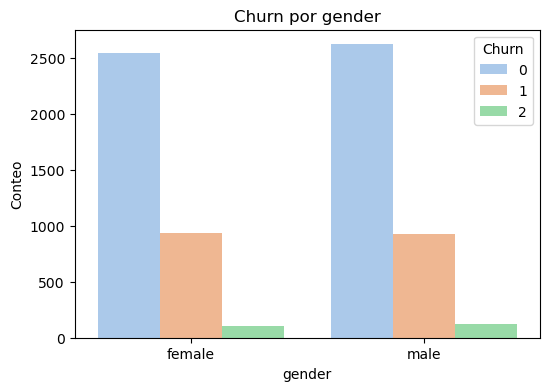

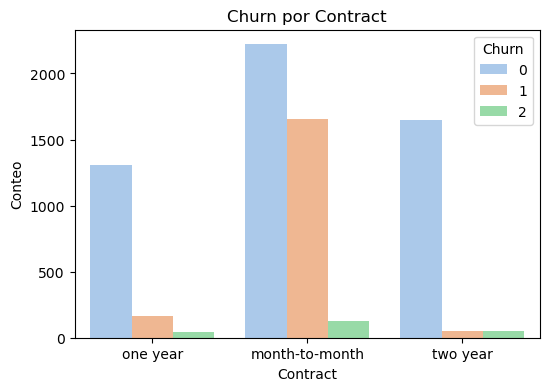

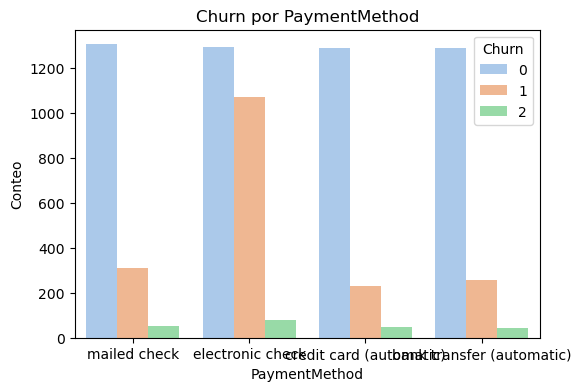

In [ ]:
categorical_cols = ['gender', 'Contract', 'PaymentMethod']  # add your columns here

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df, palette='pastel')
    plt.title(f"Churn por {col}")
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.show()


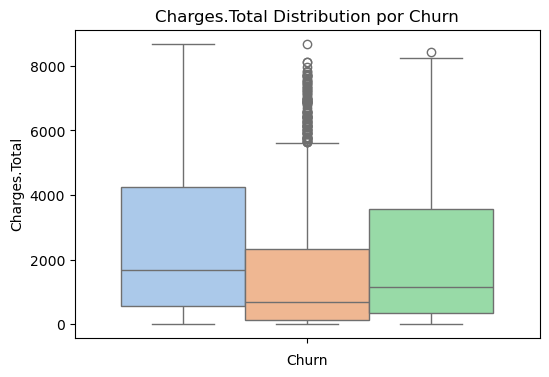

              mean    median          std
Churn                                    
0      2555.344141  1683.600  2329.456984
1      1531.796094   703.550  1890.822994
2      2196.933705  1163.175  2329.961954


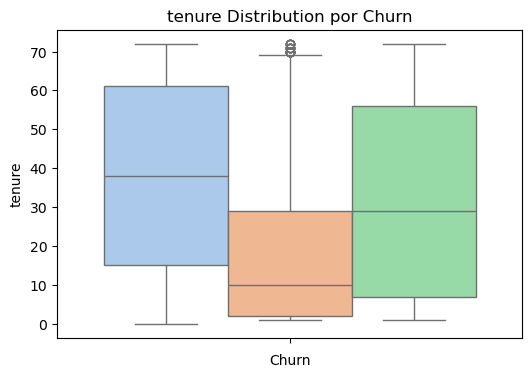

            mean  median        std
Churn                              
0      37.569965    38.0  24.113777
1      17.979133    10.0  19.531123
2      31.571429    29.0  24.998552


In [ ]:
numerical_cols = ['Charges.Total', 'tenure']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(hue='Churn', y=col, data=df,legend=False, palette='pastel')
    plt.title(f"{col} Distribuciónn por Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()
    
    print(df.groupby('Churn')[col].agg(['mean','median','std']))


# 📄Informe final

## Explicación de pasos:
<ul>
<li><h4>Limpieza y Tratamiento de Datos: </h4>
<h5>El conjunto de datos se importó desde JSON y se convirtió en un DataFrame de Pandas para su gestión estructurada.</h5>
<h5>El conjunto de datos se inspeccionó para detectar problemas comunes, como valores faltantes, duplicados, errores de formato y valores categóricos inconsistentes.</h5>
<h5>Las columnas categóricas/de texto se rellenaron con una cadena predeterminada para preservar la coherencia (p. ej., "unk").</h5>
<h5>Los valores de las cadenas categóricas se estandarizaron convirtiéndolos a minúsculas, lo que redujo la duplicación causada por la distinción entre mayúsculas y minúsculas (p. ej., "Sí" vs. "sí").</h5>
<h5>Categorías binarias como "sí" y "no" se asignaron a valores numéricos (1 y 0) para facilitar su uso en análisis y modelado.</h5>
</li>

<li><h4>Análisis Exploratorio de Datos:</h4>
<h5>Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.</h5></li>

<li><h4>Conclusiones e Insights: </h4>
<h5>Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.</h5></li>
<li><h4>Recomendaciones: </h4>
<h5>Ofrece sugerencias estratégicas basadas en tu análisis.</h5></li>
</ul>